In [10]:
# Import dependencies:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [11]:
# Create a set of random lat and long cobinations:
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)
lat_lngs = zip(lats, lngs)

lat_lngs

In [12]:
# Add the latitudes and longitudes to a list:
coordinates = list(lat_lngs)

In [13]:
# Import citipy:
from citipy import citipy

In [14]:
# Create a list for holding the cities:
cities = []

# Identify the nearest city for each latitude and longitude combination:
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add to cities list:
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm: 
len(cities)

605

In [15]:
# Import the requests library:
import requests

#Import API key:
from config import weather_api_key

# Import the time library and the datetime module from the datetime library:
import time
from datetime import datetime

In [16]:
# Starting URL for Weather Map API Call:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Create an empty list to hold the weather data:
city_data = []

# Print the beginning of the logging:
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters:
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [21]:
# Loop through all the cities in the list:
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes:
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city:
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city:
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count:
    record_count += 1

    # Run an API request for each of the cities:
    try:
        # Parse the JSON and retrieve data:
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data:
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard:
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list:
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city:
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete:
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | belyy yar
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | dalbandin
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | kloulklubed
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | vereeniging
Processing Record 10 of Set 1 | kuryk
Processing Record 11 of Set 1 | soe
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | hobyo
Processing Record 15 of Set 1 | karratha
Processing Record 16 of Set 1 | zheleznodorozhnyy
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | te anau
Processing Record 19 of Set 1 | taupo
Processing Record 20 of Set 1 | komsomolskiy
Processing Record 21 of Set 1 | richards bay
Processing Record 22 of Set 1 | takoradi
Processing Record 23 of Set 1 | lyuban
Processing Record 24 of Set 1 | tuktoyaktuk
Processi

Processing Record 35 of Set 4 | east london
Processing Record 36 of Set 4 | tasiilaq
Processing Record 37 of Set 4 | lipari
Processing Record 38 of Set 4 | tomari
Processing Record 39 of Set 4 | bara
Processing Record 40 of Set 4 | chokurdakh
Processing Record 41 of Set 4 | gamba
Processing Record 42 of Set 4 | itarema
Processing Record 43 of Set 4 | urusha
Processing Record 44 of Set 4 | nerchinskiy zavod
Processing Record 45 of Set 4 | port hardy
Processing Record 46 of Set 4 | dunedin
Processing Record 47 of Set 4 | yerbogachen
Processing Record 48 of Set 4 | kitimat
Processing Record 49 of Set 4 | bereda
Processing Record 50 of Set 4 | kabinda
Processing Record 1 of Set 5 | ondorhaan
City not found. Skipping...
Processing Record 2 of Set 5 | saint-augustin
Processing Record 3 of Set 5 | palembang
Processing Record 4 of Set 5 | opuwo
Processing Record 5 of Set 5 | umm lajj
Processing Record 6 of Set 5 | hihifo
City not found. Skipping...
Processing Record 7 of Set 5 | taoudenni
Proc

Processing Record 23 of Set 8 | bonavista
Processing Record 24 of Set 8 | vila velha
Processing Record 25 of Set 8 | sabha
Processing Record 26 of Set 8 | rocha
Processing Record 27 of Set 8 | mandal
Processing Record 28 of Set 8 | victoria
Processing Record 29 of Set 8 | batagay-alyta
Processing Record 30 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 31 of Set 8 | tiznit
Processing Record 32 of Set 8 | labutta
City not found. Skipping...
Processing Record 33 of Set 8 | viseu
Processing Record 34 of Set 8 | hofn
Processing Record 35 of Set 8 | nuuk
Processing Record 36 of Set 8 | pak chong
Processing Record 37 of Set 8 | kanturk
Processing Record 38 of Set 8 | turukhansk
Processing Record 39 of Set 8 | weihe
Processing Record 40 of Set 8 | camocim
Processing Record 41 of Set 8 | abu samrah
Processing Record 42 of Set 8 | shestakovo
Processing Record 43 of Set 8 | asyut
Processing Record 44 of Set 8 | kaeo
Processing Record 45 of Set 8 | koroni
Processing Record 46 o

Processing Record 7 of Set 12 | corumba
Processing Record 8 of Set 12 | marrakesh
Processing Record 9 of Set 12 | imbituba
Processing Record 10 of Set 12 | maseru
Processing Record 11 of Set 12 | mingaora
Processing Record 12 of Set 12 | safaga
Processing Record 13 of Set 12 | rybnaya sloboda
Processing Record 14 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 15 of Set 12 | kochubey
Processing Record 16 of Set 12 | ambon
Processing Record 17 of Set 12 | holme
Processing Record 18 of Set 12 | sotouboua
Processing Record 19 of Set 12 | west bay
Processing Record 20 of Set 12 | martyush
Processing Record 21 of Set 12 | brigantine
Processing Record 22 of Set 12 | sinop
Processing Record 23 of Set 12 | banda aceh
Processing Record 24 of Set 12 | berea
Processing Record 25 of Set 12 | poso
Processing Record 26 of Set 12 | petauke
Processing Record 27 of Set 12 | birjand
Processing Record 28 of Set 12 | hirara
Processing Record 29 of Set 12 | haibowan
City not found. S

In [22]:
len(city_data)

544

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.8909,-109.9124,92.61,69,32,5.82,MX,2022-08-02 23:00:01
1,Belyy Yar,53.6039,91.3903,56.86,82,75,2.24,RU,2022-08-02 23:04:49
2,Ushuaia,-54.8000,-68.3000,35.26,100,75,5.75,AR,2022-08-02 23:04:49
3,Albany,42.6001,-73.9662,84.16,53,35,8.93,US,2022-08-02 23:02:01
4,Dalbandin,28.8947,64.4101,87.53,21,0,5.64,PK,2022-08-02 23:04:49
5,Jamestown,42.0970,-79.2353,76.05,50,3,4.00,US,2022-08-02 23:00:36
6,Kloulklubed,7.0419,134.2556,77.50,74,100,9.93,PW,2022-08-02 23:04:50
7,Severo-Kurilsk,50.6789,156.1250,55.81,78,21,7.54,RU,2022-08-02 23:04:50
8,Vereeniging,-26.6731,27.9261,53.11,67,59,9.13,ZA,2022-08-02 23:02:43
9,Kuryk,43.2000,51.6500,84.11,33,1,11.90,KZ,2022-08-02 23:04:50


In [27]:
#New column order:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,2022-08-02 23:00:01,22.8909,-109.9124,92.61,69,32,5.82
1,Belyy Yar,RU,2022-08-02 23:04:49,53.6039,91.3903,56.86,82,75,2.24
2,Ushuaia,AR,2022-08-02 23:04:49,-54.8000,-68.3000,35.26,100,75,5.75
3,Albany,US,2022-08-02 23:02:01,42.6001,-73.9662,84.16,53,35,8.93
4,Dalbandin,PK,2022-08-02 23:04:49,28.8947,64.4101,87.53,21,0,5.64


In [28]:
# Create the output file (CSV):
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV:
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
## Creating Scatter Plots:

In [30]:
# Extract relevant fields from the DataFrame for plotting:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [ ]:
#Latitudes vs. Max Temperature:

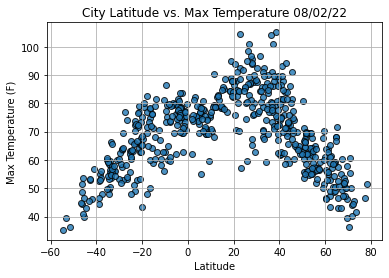

In [31]:
# Import time module:
import time

# Build the scatter plot for latitude vs. max temperature:
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties:
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure:
plt.savefig("weather_data/Fig1.png")

# Show plot:
plt.show()

In [ ]:
#Latitudes vs. Humidity:

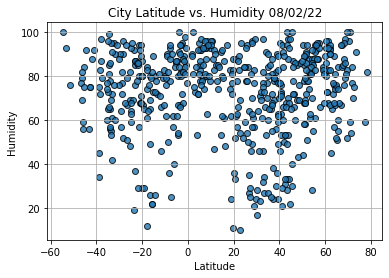

In [32]:
# Build the scatter plot for latitude vs. humidity:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties:
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure:
plt.savefig("weather_data/Fig2.png")

# Show plot:
plt.show()

In [ ]:
# Latitude vs. Cloudiness:

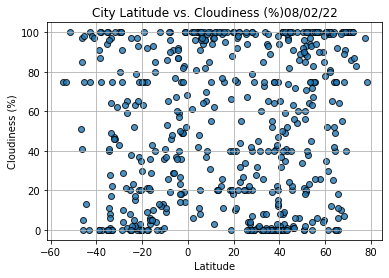

In [33]:
# Build the scatter plot for Latitude vs. Cloudiness:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties:
plt.title(f"City Latitude vs. Cloudiness (%)"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure:
plt.savefig("weather_data/Fig3.png")

# Show plot:
plt.show()

In [ ]:
# Latitude vs. Wind Speed:

In [ ]:
# Build the scatter plot for Latitude vs. Wind Speed:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties:
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure:
plt.savefig("weather_data/Fig4.png")

# Show plot:
plt.show()